# Note
The following notebook still needs additional documentation, right now the purpose is to demonstrate it. 

# Demonstration

## Tracking a Line Through time

![basic-animation.gif](https://raw.githubusercontent.com/progressEdd/projects/master/Animating-Velocity-Graph/basic-animation.gif)

## Plotting a Dot and Tracking Across Velocity Curve 

![dot-tracking-animation.gif](https://raw.githubusercontent.com/progressEdd/projects/master/Animating-Velocity-Graph/dot-tracking-animation.gif)

# Importing Libraries + Loading Data

In [1]:
from IPython.core.display import display, HTML  
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.offsetbox import AnchoredText

In [3]:
df = pd.read_csv("velocity.csv")
df

,Time (ms),Velocity
0,0,0.03
1,17,0.03
2,34,0.03
3,50,0.03
4,67,0.03
...,...,...
1314,22167,0.89
1315,22183,0.89
1316,22200,0.41
1317,22217,0.41


In [4]:
print("max time") 
display(df["Time (ms)"].max())

print("min time")
display(df["Time (ms)"].min())

print("Velocity")
display(df["Velocity"][1])

print("Max Velocity")
display(df["Velocity"].max())

print("Final time")
display(df["Time (ms)"].iloc[-1]*60/1000)

print("Final time rounded")
display(int(round(df["Time (ms)"].iloc[-1]*60/1000, 1)))

print("column titles")
column_titles = list(df.columns.values) 
display(column_titles)

display(df["Time (ms)"].index.name)

max time


22233

min time


0

Velocity


0.03

Max Velocity


20.5

Final time


1333.98

Final time rounded


1334

column titles


['Time (ms)', 'Velocity']

None

# Plotting Function

In [72]:
def animateGraph(df,x_column, y_column, dot_track, framerate):
# Setting up data
    x_df = df[x_column]
    y_df = df[y_column]
    x_max = int(np.ceil(df[x_column].max()))
    y_max = int(np.ceil(df[y_column].max())) + 2
    last_index = len(df)-1

# Check if we are plotting the graph or a graph + dot
    if(dot_track.lower() == "yes"):
        plot_dot = True
        graph_type = "dot_tracking"
    else:
        plot_dot = False  
        graph_type = "line_tracking"
        
# Animation settings
    time_seconds = x_df.iloc[-1]/1000
    totalFrames = int(round(framerate * time_seconds))

# Setting up the figure
    fig = plt.figure()
    fig.set_size_inches(20, 12)
    fig.savefig('test2png.png', dpi=100)
    plt.rcParams.update({'font.size': 24})

# Setting up the axes    
    ax = plt.axes(xlim=(0, x_max), ylim=(0, y_max))
    ax.set(title= x_column + ' vs ' + y_column,
           ylabel= y_column,
           xlabel= x_column,
           )
# build a rectangle in axes coords
    left, width = .1, .75
    bottom, height = .25, .73
    right = left + width
    top = bottom + height
    
    velocity_print = ax.text(right, top, "Velocity", 
                             horizontalalignment='right',
                             verticalalignment='top',
                             transform=ax.transAxes)
    
    time_print = ax.text(left, top, "Time", 
                             horizontalalignment='left',
                             verticalalignment='top',
                             transform=ax.transAxes)    
    
# Setting up the line plot    
    if(plot_dot == True):
        plt.plot(x_df, y_df)
        line, = plt.plot([], [], linestyle='none', marker = 'o', ms = 10, color='r')
    else:
        line, = plt.plot(x_df, y_df)

# initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,  

# animation function. This is called sequentially
    def animate(i):
        if(i > last_index):
            x_value = x_df[last_index]
            y_value = y_df[last_index]
            
            if(plot_dot == False):
                x = x_df[0:last_index]
                y = y_df[0:last_index]
            else:
                x = x_df[last_index]
                y = y_df[last_index]
        else:
            x_value = x_df[i]
            y_value = y_df[i]
            
            if(plot_dot == False):
                x = x_df[0:i]
                y = y_df[0:i]
            else:
                x = x_df[i]
                y = y_df[i]
        line.set_data(x, y)
    
    # Update the figure with x and y values    
        values_x = x_column + ": " + str(x_value)
        values_y = y_column + ": " + str(y_value)
        velocity_print.set_text(values_y)
        time_print.set_text(values_x)
        return line,
            
# call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,frames = totalFrames, interval=0, blit=False)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
    anim.save(x_column + '_vs_' + y_column + '_' + graph_type + '_animated.mp4', fps=framerate, extra_args=['-vcodec', 'libx264'])

plt.show()

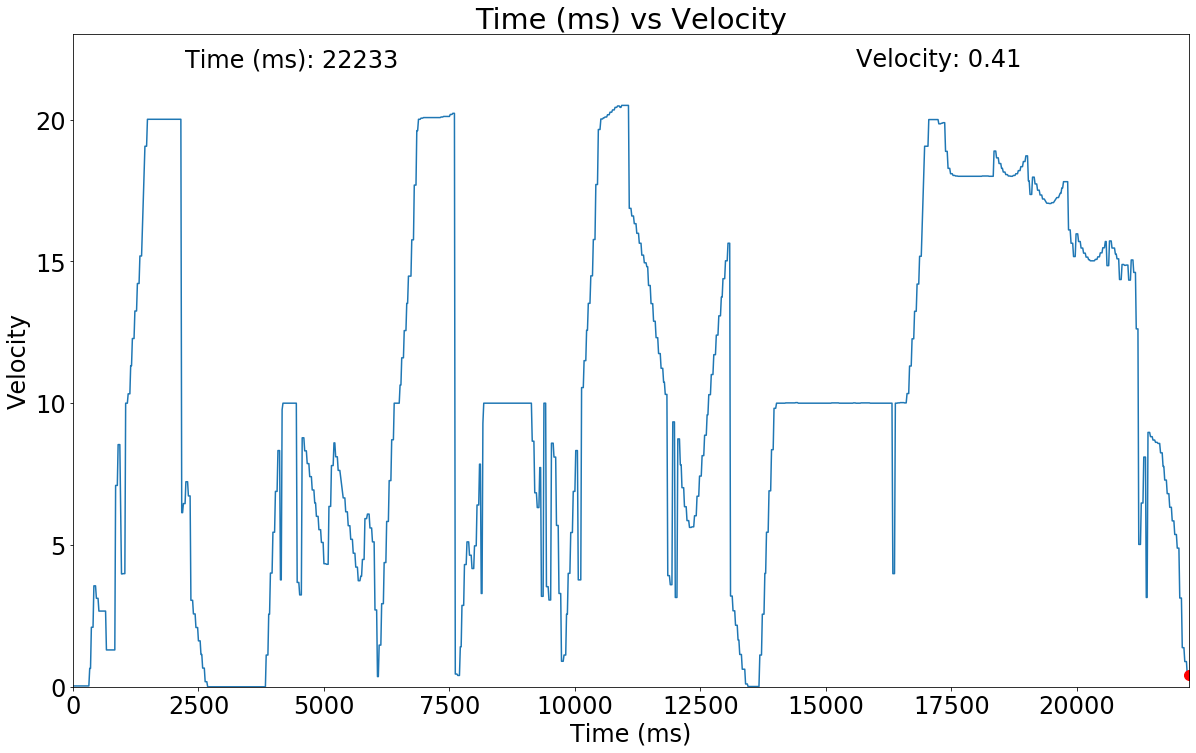

In [74]:
animateGraph(df,"Time (ms)", "Velocity", "yes", 60)

# Working Through <a href="https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/">Matplotlib Animation Tutorial</a>

I used Jake Vanderplas's sine wave example posted below as a base to understand how matplotlib animates. I modified it to make it work with the velocity and time data I was given from my friend. 

In [ ]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

## Having Line Plotted Through time

From the base I added my own modifications titled `Tracking a Line Through time`, which included
* setting variables for velocity (`y_df`) and time (`x_df`) dataframes
* setting maximums for x and y
* setting a `time_seconds` variable that converts the time in milliseconds to seconds
* setting a `framerate` variable that sets the framerate of the graph
* setting a `totalFrames` variable that sets the duration of the animation
* increasing the figure size from 64x64 to a bigger 18.5x10.4 inch higher resolution figure with `fig.set_size_inches()`
* increasing the framerate to 60 frames a second (setting `framerate` to `60`), which makes the plot smoother
   * only downside is that it will take extra time to encode the final mp4
* modifying the limits.
* adding titles for the figure
* having the the animation plot the figure as time passes, rather needing a known function to plot it

i 0
i 1
i 2
i 3
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12
i 13
i 14
i 15
i 16
i 17
i 18
i 19
i 20
i 21
i 22
i 23
i 24
i 25
i 26
i 27
i 28
i 29
i 30
i 31
i 32
i 33
i 34
i 35
i 36
i 37
i 38
i 39
i 40
i 41
i 42
i 43
i 44
i 45
i 46
i 47
i 48
i 49
i 50
i 51
i 52
i 53
i 54
i 55
i 56
i 57
i 58
i 59
i 60
i 61
i 62
i 63
i 64
i 65
i 66
i 67
i 68
i 69
i 70
i 71
i 72
i 73
i 74
i 75
i 76
i 77
i 78
i 79
i 80
i 81
i 82
i 83
i 84
i 85
i 86
i 87
i 88
i 89
i 90
i 91
i 92
i 93
i 94
i 95
i 96
i 97
i 98
i 99
i 100
i 101
i 102
i 103
i 104
i 105
i 106
i 107
i 108
i 109
i 110
i 111
i 112
i 113
i 114
i 115
i 116
i 117
i 118
i 119
i 120
i 121
i 122
i 123
i 124
i 125
i 126
i 127
i 128
i 129
i 130
i 131
i 132
i 133
i 134
i 135
i 136
i 137
i 138
i 139
i 140
i 141
i 142
i 143
i 144
i 145
i 146
i 147
i 148
i 149
i 150
i 151
i 152
i 153
i 154
i 155
i 156
i 157
i 158
i 159
i 160
i 161
i 162
i 163
i 164
i 165
i 166
i 167
i 168
i 169
i 170
i 171
i 172
i 173
i 174
i 175
i 176
i 177
i 178
i 179
i 180
i 181
i 182
i 183
i 184


i 1333


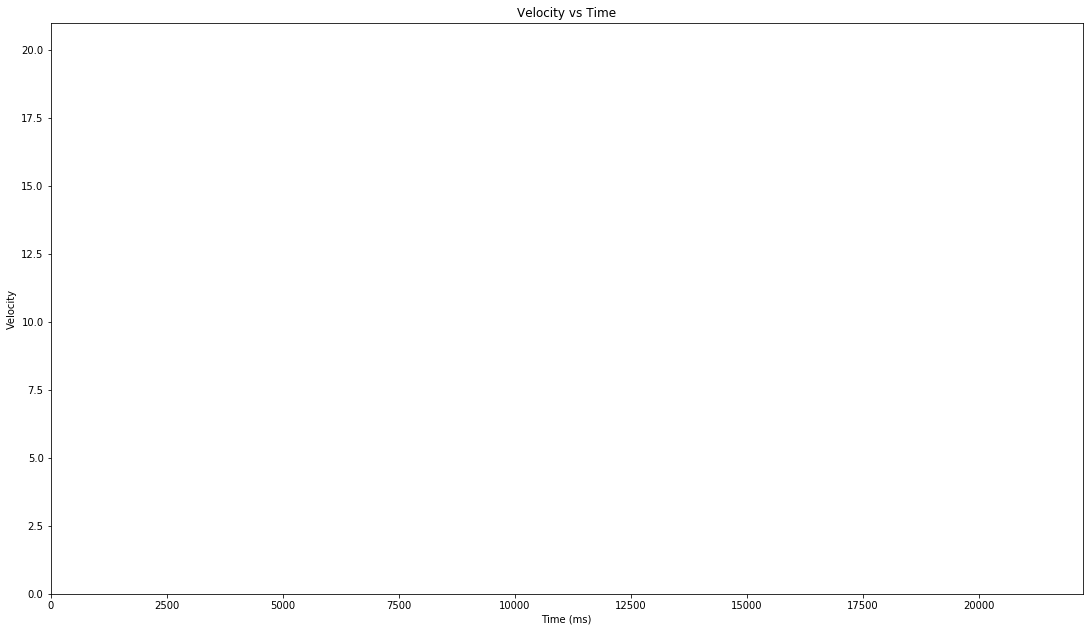

In [88]:
x_df = df["Time (ms)"]
y_df = df["Velocity"]
x_max = int(np.ceil(df["Time (ms)"].max()))
y_max = int(np.ceil(df["Velocity"].max()))

time_seconds = x_df.iloc[-1]/1000
framerate = 60
totalFrames = int(round(framerate * time_seconds))

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

# transparency settings for the figure
#fig.patch.set_alpha(0.)

ax = plt.axes(xlim=(0, x_max), ylim=(0, y_max))
ax.set(title='Velocity vs Time',
           ylabel="Velocity",
           xlabel="Time (ms)")

line, = plt.plot(x_df, y_df)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = x_df[0:i]
    print("i", i)
    y = y_df[0:i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames = totalFrames, interval=0, blit=False)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=framerate, extra_args=['-vcodec', 'libx264'])

plt.show()

### Learning How Matplotlib plots
In the following cells, I experimented with the ranges for which data to be plotted. Once I figured out putting `start:end` into a dataframe, I used this for the first function

With an understanding of this property I was able to have the graph from `0` to the value at the specific frame.

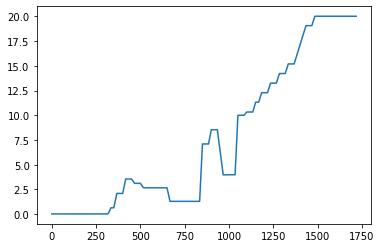

In [101]:
#plt.scatter(x_df,y_df)
plt.plot(x_df[0:100], y_df[0:100])
plt.show()

### Messing with labels

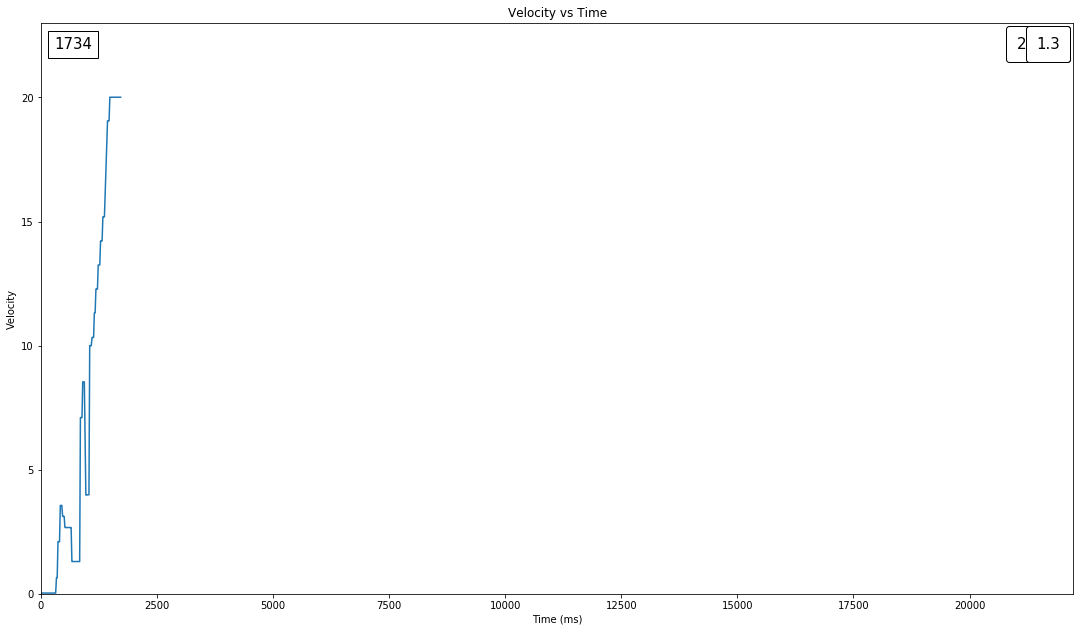

In [349]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

ax = plt.axes(xlim=(0, x_max), ylim=(0, y_max+2))
ax.set(title='Velocity vs Time',
           ylabel="Velocity",
           xlabel="Time (ms)")
        
at1 = AnchoredText(x_df[100],
    prop=dict(size=15), frameon=True,
    loc='upper left',
    )
at.patch.set_boxstyle("round,pad=0.3,rounding_size=0.5")
ax.add_artist(at1)
        
at2 = AnchoredText(y_df[100],
    prop=dict(size=15), frameon=True,
    loc='upper right',
    )
at2.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at2)

at3 = AnchoredText(1.3,
    prop=dict(size=15), frameon=True,
    loc='upper right',
    )
at3.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at3)

plt.plot(x_df[0:100], y_df[0:100])
plt.show()

### print statements

I used these print statements to figure out why my maxes were not being rounded to the nearest whole number. 

Initially, I tried using `round( #number, #decimal places)`, <a href="https://stackoverflow.com/questions/31818050/round-number-to-nearest-integer">from Stackoverflow</a> but the native function concatenated for values such as `20.5` to `20` instead of `21` 

Eventually I found a detailed explanation behind the native python `round()` function <a href="https://realpython.com/python-rounding/">from RealPython</a>, in addition to suggested alternative functions and libraries I could use that would solve the issue I was running into. The suggestion was to use `ceil` from the `math` libraries. I ended up using `ceil` from the `numpy` libraries since I didn't want to import another library


In [ ]:
print("y_max:", df["Time (ms)"].max())
print()

print("y_max ceil rounding:", np.ceil(df["Time (ms)"].max()))
print()

print("x_max:", df["Velocity"].max())
print()

print("x_max ceil rounding:", np.ceil(df["Velocity"].max()))
print()

print("issue rounded y_max (Time):", int(round(df["Time (ms)"].max(),1)))
print()


print("issue rounded x_max (Velocity):", int(round(df["Velocity"].max(),1)))
print()

## Having a Dot Tracking Along the Velocity Curve 

After making my modifications, I copied my modified version and further adjusted it further titled `Having a Dot Tracking Along the Velocity Curve` to print the plot first and have a single point track along the plotted graph

Changes from the original `Having Line Plotted Through time`
* added red dot for tracking instead of line
    * used following additional arguments to set the dot `linestyle='none', marker = 'o', ms = 10, color='r'`, I learned of these parameters from adrian prince-whelan's demonstration of 
   <a href="https://adrian.pw/blog/matplotlib-transparent-animation/">Making a Matplotlib animation with a transparent background</a> 
    * `linestyle='none'` prevents lines from being drawn
    * `marker = 'o'` sets the dot 
    * `ms = 10` sets the dot size
    * `color='r'` sets the dot color
* messing with video transparency as well from the same post
    * main issue right now is getting the correct save settings
* changed x `linspace` value to have the previous frame
    * added conditional where at `i=0`, `i` would start at `0` instead of `-1` when calling the `x_df[i-1]` and `x_df[i]` dataframe entry
  

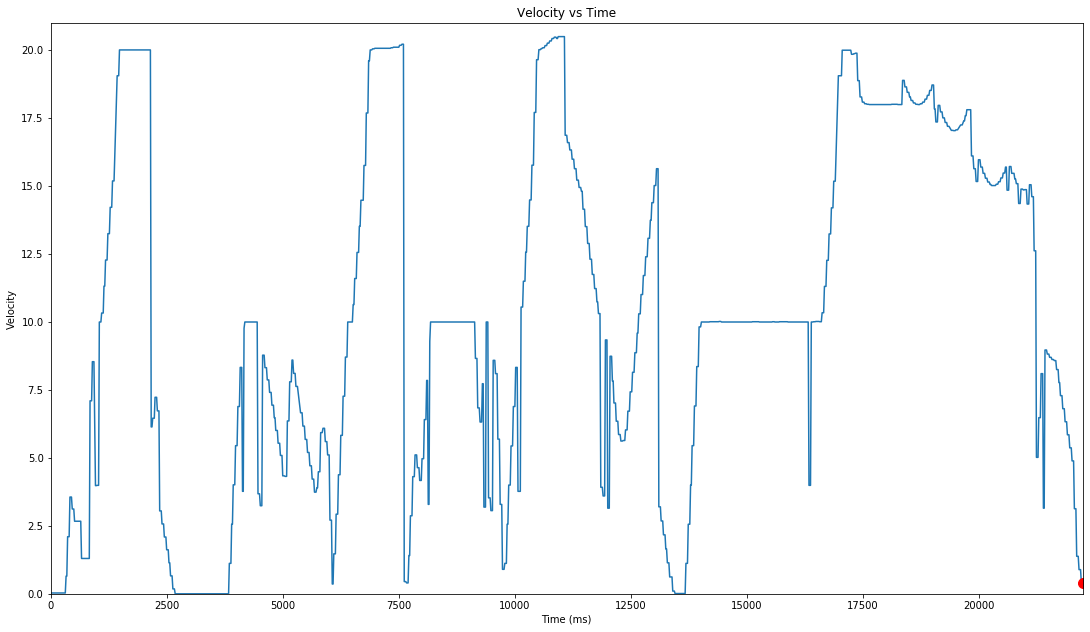

In [106]:
x_df = df["Time (ms)"]
y_df = df["Velocity"]
x_max = int(np.ceil(df["Time (ms)"].max()))
y_max = int(np.ceil(df["Velocity"].max()))

time_seconds = x_df.iloc[-1]/1000
framerate = 60
totalFrames = len(df)

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

# transparency settings for the figure
#fig.patch.set_alpha(0.)

ax = plt.axes(xlim=(0, x_max), ylim=(0, y_max))
ax.set(title='Velocity vs Time',
           ylabel="Velocity",
           xlabel="Time (ms)")

# transparency settings for the plot area
#ax.patch.set_facecolor('#ababab')
#ax.patch.set_alpha(0)

plt.plot(x_df, y_df)
line, = plt.plot([], [], linestyle='none', marker = 'o', ms = 10, color='r')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = x_df[i]
    #print("x")
    #print(x)
    y = y_df[i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames = totalFrames, interval=0, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('dot_tracking_animation.mp4', fps=framerate, extra_args=['-vcodec', 'libx264'])

plt.show()

## Figuring out `Keyerror`

While running `Dot Tracking Along the Velocity Curve` I got a consistent `keyerror` when plotting i. The following code blocks helped me debug the values of i for each iteration.

I later realized that the `keyerror` was caused by my totalFrames calculation, which took the last value of the data (milliseconds converted to seconds), multiplied it by the framerate, and was rounded to get total number of frames. Before changing to use the length of the dataframe, the `totalFrames` was `1333.98`, which was rounded to 1334. The `keyerror` occured because `animate(i)` uses the `frames` variable as a index. Once animate reached the length of the dataframe (`1319`) the animation stopped, but in the `animation.FuncAnimation()` function continued to pass values in for `i`. When computing for `x`, this caused a `keyerror` since `animation.FuncAnimation()` would continue to feed values in for `i`, but in the dataframe no such values existed.

To prevent this from happening, I added a conditional that when we reached the end of the dataframe, we would use the last value of the dataframe. 

In [74]:
x_df = df["Time (ms)"]
y_df = df["Velocity"]

for i in x_df:
    x = x_df[i]
    #print("i = ",i,",", "a = ",a)
    y = y_df[i]
    print("i = ", i, "x = ", x, ",", "y = ",y)
    print()

i =  0 x =  0 , y =  0.03

i =  17 x =  284 , y =  0.03

i =  34 x =  567 , y =  2.67

i =  50 x =  834 , y =  1.3

i =  67 x =  1134 , y =  10.33

i =  84 x =  1467 , y =  19.06

i =  100 x =  1734 , y =  20.01

i =  117 x =  2017 , y =  20.01

i =  134 x =  2300 , y =  6.73

i =  150 x =  2567 , y =  1.14

i =  167 x =  2850 , y =  0.0

i =  184 x =  3134 , y =  0.0

i =  200 x =  3400 , y =  0.0

i =  217 x =  3684 , y =  0.0

i =  234 x =  3967 , y =  4.01

i =  250 x =  4234 , y =  10.0

i =  267 x =  4517 , y =  3.24

i =  284 x =  4800 , y =  6.94

i =  300 x =  5067 , y =  4.32

i =  317 x =  5400 , y =  6.66

i =  334 x =  5684 , y =  3.74

i =  350 x =  5950 , y =  5.6

i =  367 x =  6234 , y =  4.38

i =  384 x =  6517 , y =  10.64

i =  400 x =  6784 , y =  15.76

i =  417 x =  7067 , y =  20.07

i =  434 x =  7350 , y =  20.09

i =  450 x =  7617 , y =  0.45

i =  467 x =  7900 , y =  4.64

i =  484 x =  8184 , y =  10.0

i =  500 x =  8450 , y =  10.0

i =  517 x =  8733 

KeyError: 1334

In [58]:
df.iloc[1318]
#len(df)

Time (ms)    22233.00
Velocity         0.41
Name: 1318, dtype: float64

In [75]:
display(x_df)

0           0
1          17
2          34
3          50
4          67
        ...  
1314    22167
1315    22183
1316    22200
1317    22217
1318    22233
Name: Time (ms), Length: 1319, dtype: int64

In [103]:
display(framerate * time_seconds)
totalFrames

1333.98

1334

# Messing with a overlapping graph

<Figure size 1332x756 with 0 Axes>

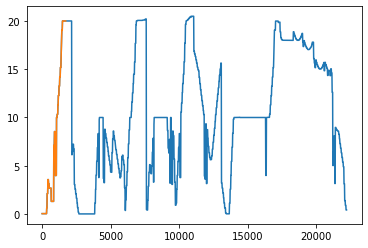

In [276]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

fig, ax = plt.subplots()
ax.plot(x_df, y_df)
plt.plot(x_df[0:100], y_df[0:100])

plt.show()